In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
traffic_data = pd.read_csv('traffic.csv')
print(traffic_data.head())
print(traffic_data.info())
print(traffic_data.describe())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-

In [6]:
sns.set_theme(style="whitegrid")

## 1. Traffic Situation Distribution by Day of the Week

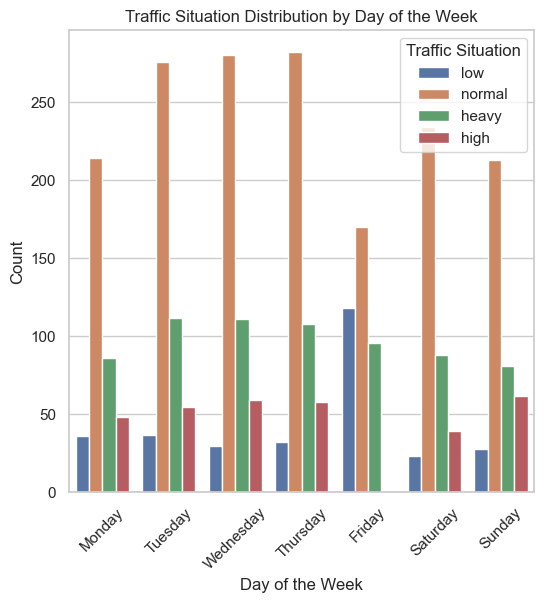

In [8]:
plt.figure(figsize=(6, 6))
sns.countplot(x="Day of the week", hue="Traffic Situation", data=traffic_data, order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Traffic Situation Distribution by Day of the Week")
plt.legend(title="Traffic Situation")
plt.xticks(rotation=45)
plt.show()

Traffic congestion varies throughout the week.

Weekdays typically have more traffic congestion due to work commutes.

Weekends show a different pattern, potentially with more normal traffic.

## 2. Correlation Between Different Vehicle Types


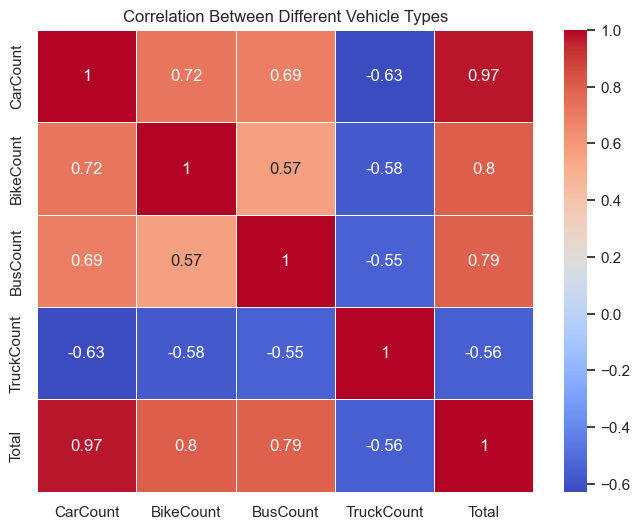

In [9]:
corr_matrix = traffic_data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Different Vehicle Types")
plt.show()


CarCount strongly correlates with BusCount and TruckCount, indicating that their traffic levels rise and fall together.

BikeCount has a weak correlation with other vehicle types, meaning bicycle traffic does not necessarily follow motorized vehicle trends.

Understanding these correlations can help in predicting vehicle flow patterns.

## 3. Traffic Situation Distribution by Hour



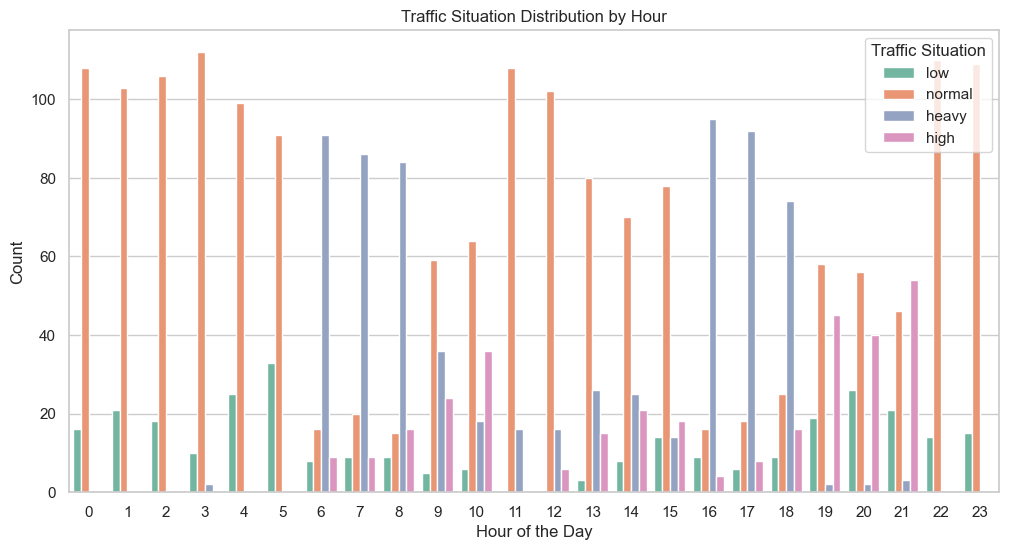

In [10]:
traffic_data['Time'] = pd.to_datetime(traffic_data['Time'], format='%I:%M:%S %p').dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x="Time", hue="Traffic Situation", data=traffic_data, palette="Set2")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Traffic Situation Distribution by Hour")
plt.legend(title="Traffic Situation")
plt.xticks(range(0, 24))
plt.show()


Morning rush hours (7-9 AM) and evening rush hours (5-7 PM) show peak traffic.

Late-night hours (12 AM - 5 AM) mostly have low traffic.

Midday traffic is moderate, indicating a balance between work commutes and other travel activities.


## 4. Distribution of Total Vehicle Counts by Day of the Week

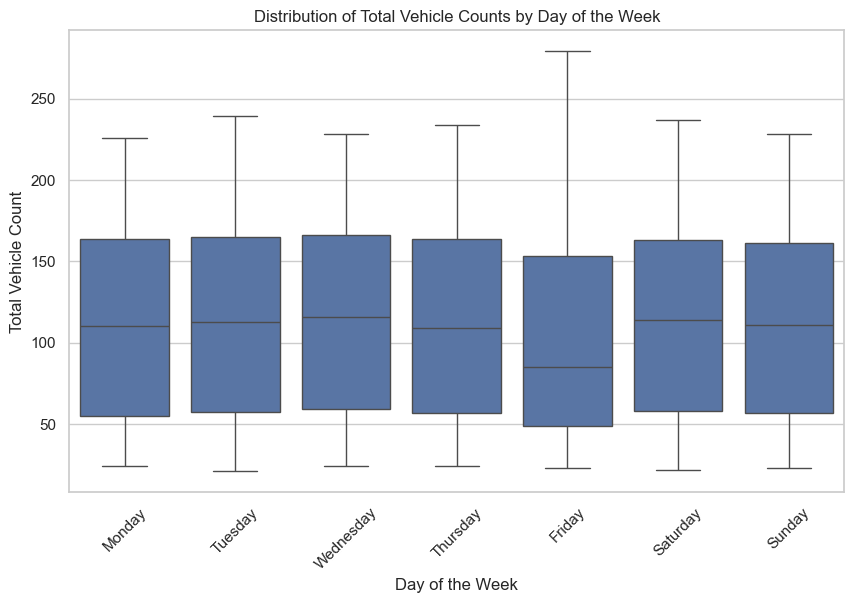

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Day of the week", y="Total", data=traffic_data, order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
plt.xlabel("Day of the Week")
plt.ylabel("Total Vehicle Count")
plt.title("Distribution of Total Vehicle Counts by Day of the Week")
plt.xticks(rotation=45)
plt.show()


Weekdays (Monday-Friday) have higher total vehicle counts than weekends.

Fridays show more traffic fluctuations, possibly due to weekend travel plans.

Saturdays and Sundays have lower traffic, which aligns with reduced work-related travel.

## 5. Variance in Vehicle Counts Across Vehicle Types

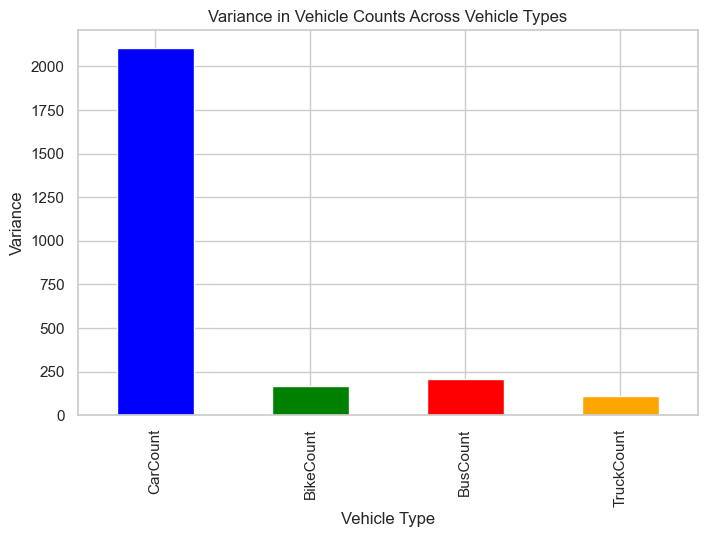

In [12]:
variance_values = traffic_data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].var()

plt.figure(figsize=(8, 5))
variance_values.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.xlabel("Vehicle Type")
plt.ylabel("Variance")
plt.title("Variance in Vehicle Counts Across Vehicle Types")
plt.show()


CarCount has the highest variance, meaning car traffic fluctuates significantly.

TruckCount also has high variance, likely due to changing logistics and delivery schedules.

BikeCount has the lowest variance, suggesting a more stable pattern throughout the day.

BusCount shows moderate variance, reflecting scheduled services.

## 6. Average Vehicle Count Change Over Time

<Figure size 1200x600 with 0 Axes>

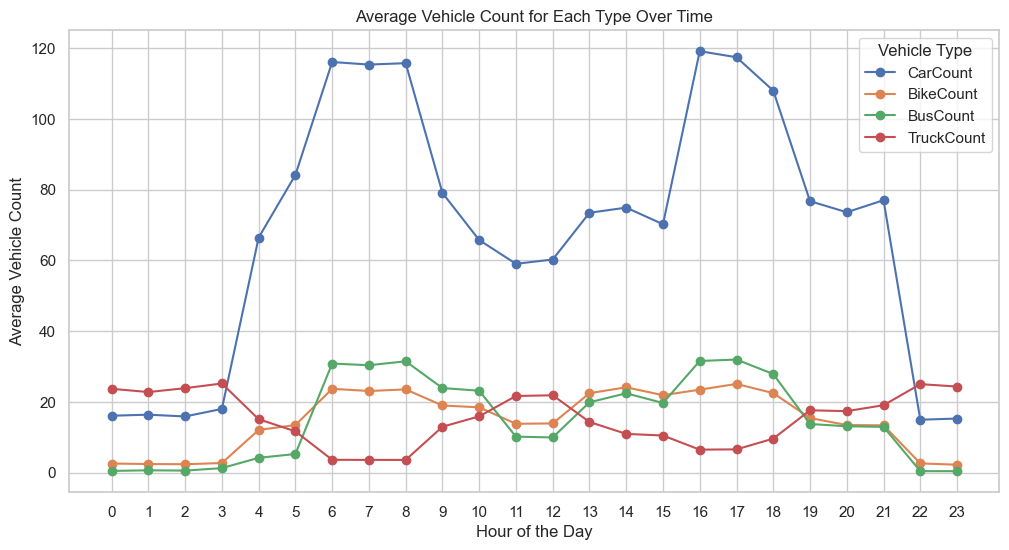

In [13]:
hourly_avg = traffic_data.groupby("Time")[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind="line", marker="o", figsize=(12, 6))
plt.xlabel("Hour of the Day")
plt.ylabel("Average Vehicle Count")
plt.title("Average Vehicle Count for Each Type Over Time")
plt.legend(title="Vehicle Type")
plt.xticks(range(0, 24))
plt.show()


Car traffic peaks during rush hours (7-9 AM and 5-7 PM), following commuting patterns.

Truck traffic is higher during nighttime and early morning, likely due to freight movements.

Bus traffic remains relatively stable but follows rush hour trends.

Bike traffic remains low with slight increases in the morning and evening, suggesting commuter cyclists.